# **Previsão de Pouso do Primeiro Estágio de Foguetes Falcon 9**


Nesta seção criaremos uma pipeline de machine learning para prever se o primeiro estágio pousará com sucesso com base nos dados das seções anteriores.

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


### Objetivos

* Criar uma coluna para a classe;
* Padronizar os dados;
* Dividir os dados em dados de treinamento e dados de teste;
* Encontrar o método com melhor desempenho usando os dados de teste.

### Importação das bibliotecas e definição das funções auxiliares

In [2]:
# Biblioteca para manipulação e análise de dados
import pandas as pd
# Biblioteca utilizada para trabalho com funções matemáticas de alto nível para manipulação de matrizes uni e multidimensionais
import numpy as np
# Biblioteca de plotagem para python (estrutura de plotagem similar ao MatLab)
import matplotlib.pyplot as plt
# Biblioteca de visualização de dados Python baseada em matplotlib. Fornece uma interface de alto nível para desenhar gráficos estatísticos
import seaborn as sns
# Pré-processamento para padronização dos dados
from sklearn import preprocessing
# Permite dividir nossos dados em dados de treinamento e teste
from sklearn.model_selection import train_test_split
# Permite testar parâmetros de algoritmos de classificação e encontrar o melhor
from sklearn.model_selection import GridSearchCV
# Algoritmo de classificação regressão logística
from sklearn.linear_model import LogisticRegression
# Algoritmo de classificação Support Vector Machine
from sklearn.svm import SVC
# Algoritmo de classificação Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Algoritmo de classificação K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# Função que constrói uma matriz de confusão
def plot_confusion_matrix(y,y_predict):
    "Esta função plota a matiz de confusão"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); # annot= True para anotar células
    ax.set_xlabel('Rótulos de previsão')
    ax.set_ylabel('Rótulos verdadeiros')
    ax.set_title('Matriz de Confusão'); 
    ax.xaxis.set_ticklabels(['Falhas', 'Pousos']); ax.yaxis.set_ticklabels(['Falhas', 'Pousos'])

### Carrega o dataframe

In [4]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# Ou através do código abaixo

# data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

# Ou através do código abaixo

# X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_3.csv')

X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


### Criação de coluna classe

Cria uma matriz NumPy da coluna <code>Class</code> em <code>data</code>, aplicando o método <code>to_numpy()</code> e então o atribui à variável <code>Y</code>, certificando que a saída seja uma série Pandas

In [6]:
Y = pd.Series(data['Class'].to_numpy())
Y

0     0
1     0
2     0
3     0
4     0
     ..
85    1
86    1
87    1
88    1
89    1
Length: 90, dtype: int64

### Padronização dos dados

Padroniza os dados em <code>X</code> e os reatribui à variável <code>X</code> usando a transformação disponível pela biblioteca preprocessing.

In [7]:
transform = preprocessing.StandardScaler()
X = transform.fit(X).transform(X)
X[0:5]

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
        -5.51677284e-01,  3.44342023e+00, -1.85695338e-01,
        -3.33333333e-01, -1.05999788e-01, -2.42535625e-01,
        -4.29197538e-01,  7.97724035e-01, -5.68796459e-01,
        -4.10890702e-01, -4.10890702e-01, -1.50755672e-01,
        -7.97724035e-01, -1.50755672e-01, -3.92232270e-01,
         9.43398113e+00, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-0

### Divisão dos dados em dados de treinamento e dados de teste

Dividimos os dados em dados de treinamento e dados de teste usando a função <code>train_test_split</code>. Os dados de treinamento são divididos em dados de validação, um segundo conjunto usado para dados de treinamento; em seguida, os modelos são treinados e os hiperparâmetros são selecionados usando a função <code>GridSearchCV</code>.

Use a função train_test_split para dividir os dados X e Y em dados de treinamento e teste. Definindo o parâmetro test_size como 0,2 e random_state como 2. Os dados de treinamento e os dados de teste devem ser atribuídos aos seguintes rótulos: <code>X_train, X_test, Y_train, Y_test</code>.


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (72, 83) (72,)
Test set: (18, 83) (18,)


Vemos que temos apenas 18 amostras de teste.

In [9]:
Y_test.shape

(18,)

### Regressão logística

Cria um objeto de regressão logística e então cria um objeto GridSearchCV <code>logreg_cv</code> com cv = 10. Ajusta o objeto para encontrar os melhores parâmetros do dicionário <code>parâmetros</code>.

In [10]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [11]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

Produzimos o objeto <code>GridSearchCV</code> para regressão logística. Exibimos os melhores parâmetros usando o atributo de dados <code>best_params\_</code> e a precisão nos dados de validação usando o atributo de dados <code>best_score\_</code>.

In [12]:
print("tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


Calcula a precisão nos dados de teste usando o método <code>score</code>:

In [13]:
print("Test set Accuracy: ", logreg_cv.score(X_test, Y_test))

Test set Accuracy:  0.8333333333333334


Plotagem da matriz de confusão

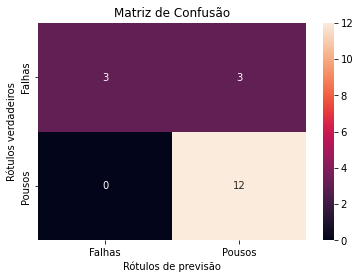

In [16]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examinando a matriz de confusão, vemos que a regressão logística pode distinguir entre as diferentes de classes. Vemos que o maior problema são os falsos positivos.

### Support Vector Machine

Cria um objeto support vector machine e, em seguida, cria um objeto <code>GridSearchCV</code> <code>svm_cv</code> com cv = 10. Ajustamos o objeto para encontrar os melhores parâmetros do dicionário <code>parâmetros</code>.

In [17]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [18]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm_cv = GridSearchCV(svm, parameters, cv = 10)
svm_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [19]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


Calcula a precisão de svm_cv nos dados de teste usando o método <code>score</code>:

In [20]:
svm_cv.score(X_test, Y_test)

0.8333333333333334

Plotagem da matriz de confusão

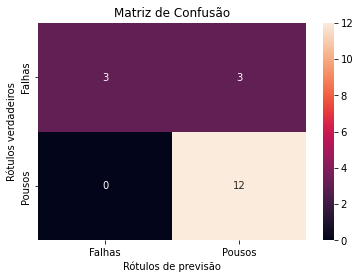

In [21]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### Árvore de Decisão (Decision Tree Classifier)

Cria um objeto decision tree classifier e depois cria um objeto <code>GridSearchCV</code> <code>tree_cv</code> com cv = 10. Ajustamos o objeto para encontrar os melhores parâmetros do dicionário <code>parâmetros</code>.

In [22]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [23]:
tree_cv = GridSearchCV(tree, parameters, cv = 10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [24]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.9


Calcula a precisão do tree_cv nos dados de teste usando o método <code>score</code>:

In [25]:
tree_cv.score(X_test, Y_test)

0.8333333333333334

Plotagem da matriz de confusão

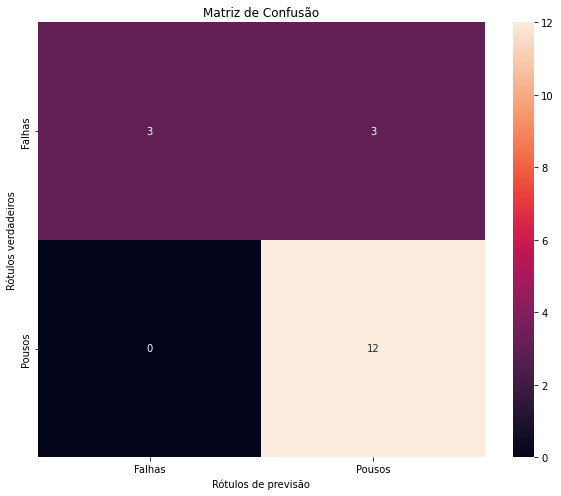

In [26]:
plt.figure(figsize = (10,8))
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### K nearest neighbors

Cria um objeto k nearest neighbors e então cria um objeto <code>GridSearchCV</code> <code>knn_cv</code> com cv = 10. Ajustamos o objeto para encontrar os melhores parâmetros do dicionário <code>parâmetros</code>.

In [27]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [28]:
knn_cv = GridSearchCV(KNN, parameters, cv = 10)
knn_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [29]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


Calcula a precisão do knn_cv nos dados de teste usando o método <code>score</code>:

In [30]:
knn_cv.score(X_test, Y_test)

0.8333333333333334

Plotagem da matriz de confusão

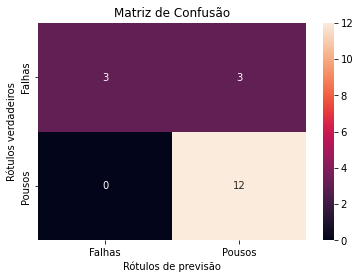

In [31]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### Determinação do método com melhor desempenho usando os dados de teste

In [32]:
print('Accuracy for Logistics Regression method:', logreg_cv.score(X_test, Y_test))
print( 'Accuracy for Support Vector Machine method:', svm_cv.score(X_test, Y_test))
print('Accuracy for Decision tree method:', tree_cv.score(X_test, Y_test))
print('Accuracy for K nearest neighbors method:', knn_cv.score(X_test, Y_test))

Accuracy for Logistics Regression method: 0.8333333333333334
Accuracy for Support Vector Machine method: 0.8333333333333334
Accuracy for Decision tree method: 0.8333333333333334
Accuracy for K nearest neighbors method: 0.8333333333333334


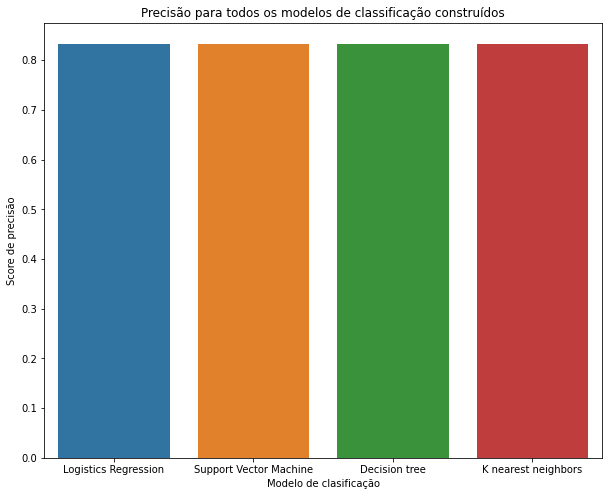

In [33]:
data_bar_plot = {'Classification Model': ['Logistics Regression', 'Support Vector Machine', 'Decision tree', 'K nearest neighbors'],
'Accuracy Score': [logreg_cv.score(X_test, Y_test), svm_cv.score(X_test, Y_test), tree_cv.score(X_test, Y_test), knn_cv.score(X_test, Y_test)]}

df_bar_plot = pd.DataFrame(data_bar_plot)

plt.figure(figsize = (10,8))
sns.barplot(data = df_bar_plot, x = "Classification Model", y = "Accuracy Score")

plt.xlabel('Modelo de clasificação') # adiciona o rótulo x ao gráfico
plt.ylabel('Score de precisão') # adiciona o rótulo y ao gráfico
plt.title('Precisão para todos os modelos de classificação construídos') # adiciona o título ao gráfico
plt.show()